# Обработка изображений и компьютерное зрение

Напишите на Python реализацию как минимум одного алгоритма на выбор:
 любая на выбор цветовая обработка, перевод в другое цветовое пространство или фильтрация. 

Изображение выберите самостоятельно.

### Решение:

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import imageio

In [2]:
img = imageio.imread('1_Image_Processing/cat-color.png')
# img = img[:,:,0].astype(np.float32) / 255
img = img.astype(np.float32) / 255
print(img.shape)

(667, 730, 3)


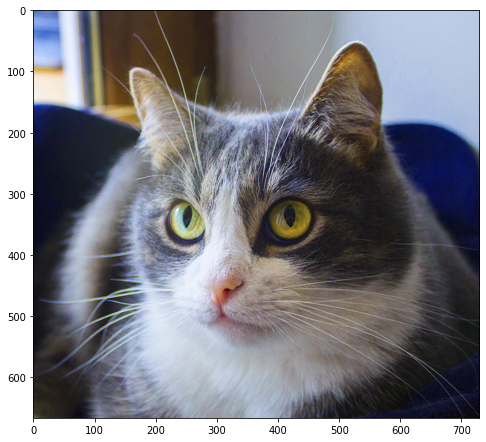

In [3]:
plt.figure(figsize=(8, 8))
plt.imshow(img)

In [8]:
# Функция для применения эффектов к изображению.

def img_mask(img, mask=None, is_draw=True):
    win_size = mask.shape
    out_img = np.zeros((img.shape[0] - win_size[0] + 1,
                       img.shape[1] - win_size[1] + 1, 3), 
                       dtype=np.float32)

    for i in range(out_img.shape[0]):
        for j in range(out_img.shape[1]):
            x = img[i:i+win_size[0], j:j+win_size[1]]

            out_img[i,j,0] = np.sum(mask*x[:,:,0])
            out_img[i,j,1] = np.sum(mask*x[:,:,1])
            out_img[i,j,2] = np.sum(mask*x[:,:,2])
    if is_draw:
        plt.figure(figsize=(8, 8))
        plt.imshow(out_img)
        plt.show()
    return out_img

### Box blur

In [5]:
win_size = (11, 11)
box_blure = np.ones(win_size, dtype=np.float32)
box_blure = box_blure / np.sum(box_blure)

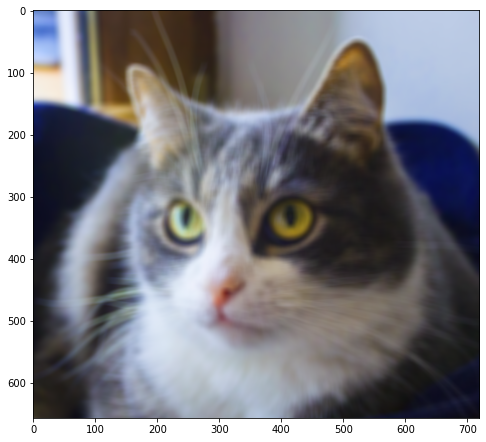

In [9]:
img_filtered = img_mask(img, box_blure)

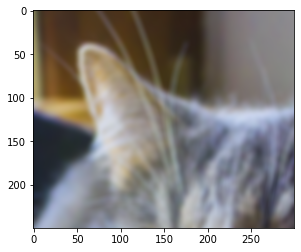

In [17]:
plt.imshow(img_filtered[50:300, 100:400])
plt.show()

### Gaussian blur

In [18]:
win_size = (11, 11)
sigma = 3
gausian = np.zeros(win_size, dtype=np.float32)
for i in range(gausian.shape[0]):
    for j in range(gausian.shape[1]):
        gausian[i,j] = np.exp(-((i-gausian.shape[0]//2)/ sigma)**2/2 
                        -((j-gausian.shape[1]//2)/ sigma)**2/2)
gausian = gausian / np.sum(gausian)

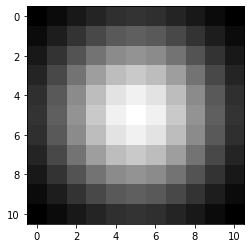

In [19]:
plt.imshow(gausian, cmap='gray')

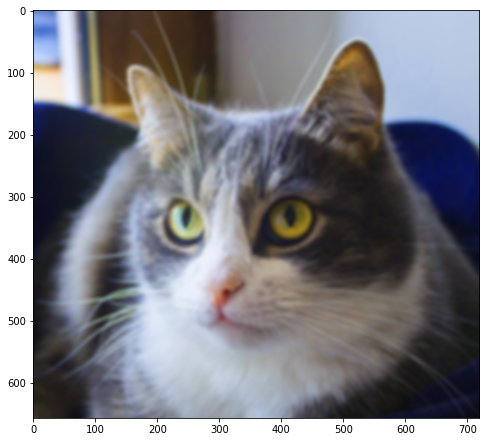

In [20]:
img_filtered = img_mask(img, gausian)

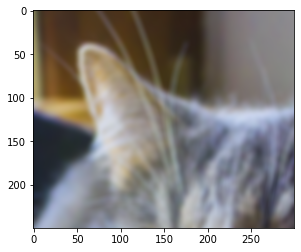

In [21]:
plt.imshow(img_filtered[50:300, 100:400])
plt.show()

### Выделение границ.

In [22]:
#Возьмем два фильтра для вертикальных  и для горизонтальных линий.
ww = np.array([[-1,-1,-1],
               [ 0, 0, 0],
            [ 1, 1, 1]])

wh = np.array([[-1,0,1],
               [-1,0,1],
               [-1,0,1]]) 

# Применим их к нашему изображению.
img_border_horisont = img_mask(img, ww, is_draw=False) 
img_border_vert = img_mask(img, wh, is_draw=False)   

Посмотрим на результаты

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


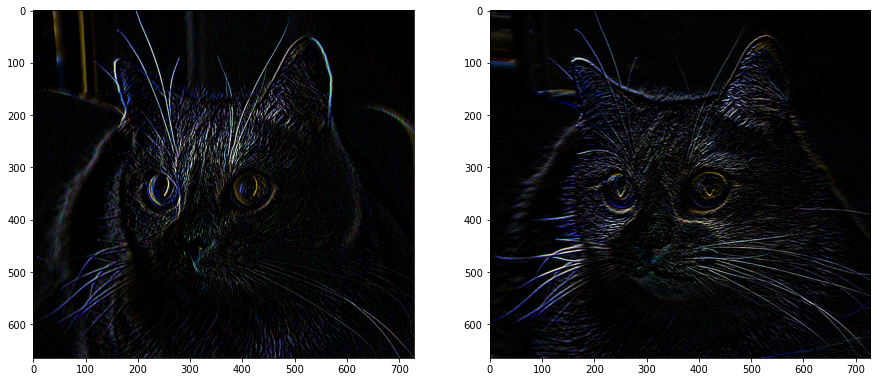

In [28]:
fig,ax = plt.subplots(nrows=1, ncols=2, figsize=(15, 15))

ax[0].imshow(img_border_vert)
ax[1].imshow(img_border_horisont)
plt.show()

Объединим эти фильтры.

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


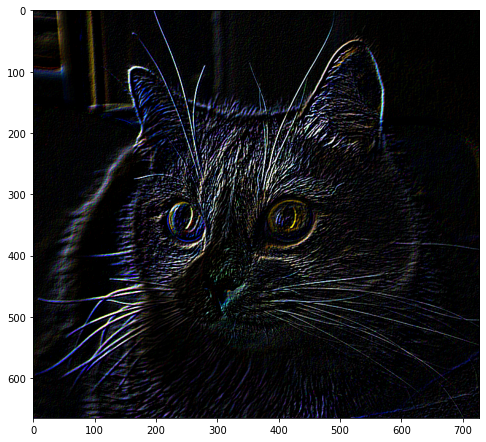

In [29]:
img_border = img_border_vert+img_border_horisont
plt.figure(figsize=(8, 8))
plt.imshow(img_border)
plt.show()

### Добавим фильтр который будет перобразовывать интенсивность изображения.

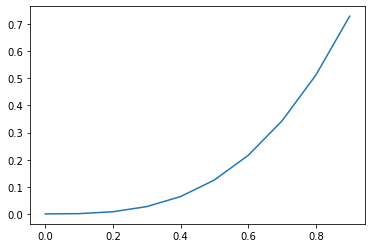

In [30]:
x = np.arange(0,1,0.1)
y = [v**3 for v in x]

plt.plot(x,y)
plt.show()

In [31]:
def x_3(z):
    return z**3

In [33]:
def img_filter(img, filter):
    out_img = np.zeros((img.shape), dtype=np.float32)

    for i in range(out_img.shape[0]):
        for j in range(out_img.shape[1]):
            x = img[i, j]
            out_img[i,j,0] = filter(x[0])
            out_img[i,j,1] = filter(x[1])
            out_img[i,j,2] = filter(x[2])
    return out_img

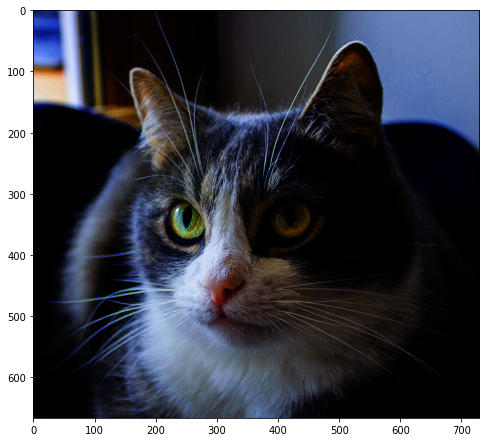

In [34]:
img_filtered = img_filter(img, x_3)
plt.figure(figsize=(8, 8))
plt.imshow(img_filtered)
plt.show()